In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder  




In [2]:
data=pd.read_csv('D:/dinesh document/data/fraud.csv')


In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data_fraud=data.copy()

In [5]:
data_fraud.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data_fraud.shape

(6362620, 11)

In [7]:
data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
data_fraud.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### There are no missing values in data

In [9]:
data_fraud['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
data_fraud['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
163    46352
139    46054
403    45155
43     45060
355    44787
15     44609
186    43747
306    43615
17     43361
259    43328
16     42471
379    41759
14     41485
42     41304
354    40696
20     40625
162    40622
402    40218
331    40186
36     39774
164    39102
188    39079
44     38523
380    37693
9      37628
       ...  
57         6
623        6
113        6
616        6
152        6
124        4
114        4
706        4
432        4
693        4
435        4
246        4
729        4
76         4
708        4
54         4
593        4
622        4
721        4
293        4
627        4
29         4
28         4
539        4
197        4
725        4
245        4
655        4
112        2
662        2
Name: step, Length: 743, dtype: int64

#### Here negative class(not fraud) data is more than positive class(fraud) data, hence data is imbalanced

In [11]:
genuine_percentage = data_fraud['isFraud'].value_counts()[0]/(len(data_fraud))
fraud_percentage = data_fraud['isFraud'].value_counts()[1]/(len(data_fraud))
d = {'Genuine': genuine_percentage , 'Fraud':fraud_percentage}
percentage=pd.DataFrame(data=d,index=[0])
percentage

,Genuine,Fraud
0,0.998709,0.001291


### bar plot of percentage of genuine and fraud classes

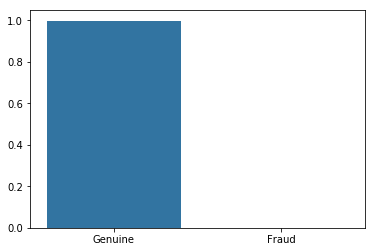

In [12]:
sns.barplot(data=percentage)

#### Percentage of genuine class is more than fraud class

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


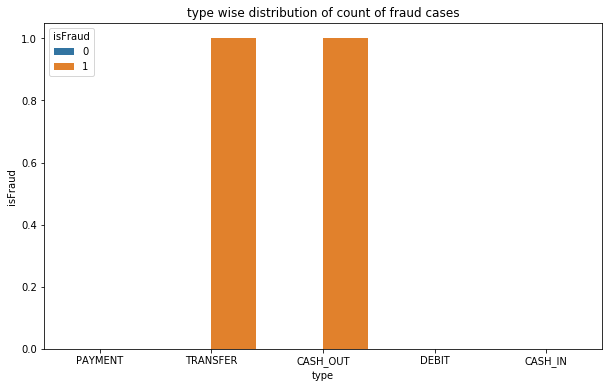

In [13]:
fig,ax=plt.subplots(figsize=(10,6))
#Barplot for Holiday distribution of counts
sns.barplot(data=data_fraud,x='type',y='isFraud',hue='isFraud')
ax.set_title('type wise distribution of count of fraud cases')
plt.show()

### Pie chart for type of payment

In [14]:
def label_function(val):
    return f'{val / 100 * len(data_fraud):.0f}\n{val:.0f}%'

Text(0, 0.5, 'Per type')

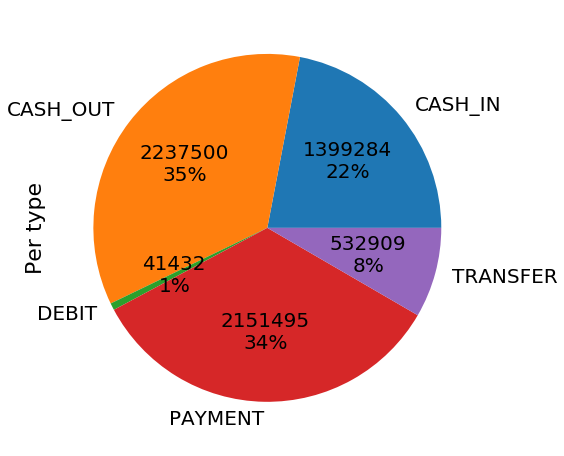

In [15]:
def label_function(val):
    return f'{val / 100 * len(data_fraud):.0f}\n{val:.0f}%'

fig, (ax1) = plt.subplots(ncols=1, figsize=(15,8))


data_fraud.groupby('type').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                   ax=ax1)
ax1.set_ylabel('Per type', size=22)


#### Here transanction type of CASH_OUT, PAYMENT and CASH_IN is more than DEBIT and TRANSFER

### Histogram of amount values

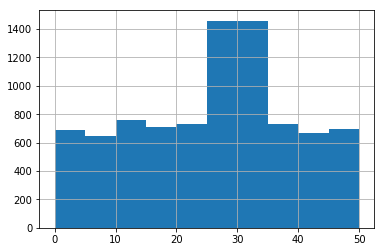

In [16]:
data_fraud['amount'].hist(bins=[0,5,10,15,20,25,35,40,45,50])

#### Distribution of amount is similar to negatively skewed

In [17]:
data_fraud.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### Histogram of oldbalanceOrg values

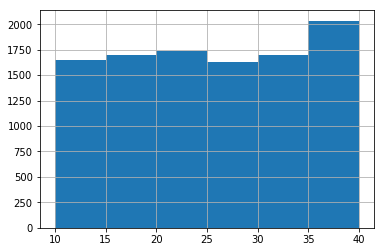

In [18]:
data_fraud['oldbalanceOrg'].hist(bins=[10,15,20,25,30,35,40])

#### Distribution of amount is similar to negatively skewed


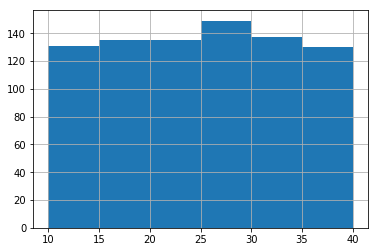

In [19]:
data_fraud['newbalanceOrig'].hist(bins=[10,15,20,25,30,35,40])

#### Distribution of newbalanceorig is similar to negatively skewed

### Histogram of oldbalancedest

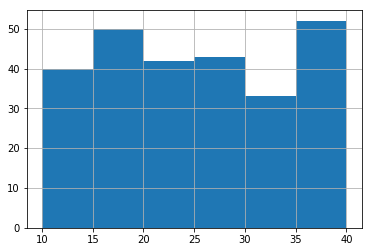

In [20]:
data_fraud['oldbalanceDest'].hist(bins=[10,15,20,25,30,35,40])

#### Distribution of oldbalancedest is similar to negatively skewed

### Histogrram of newbalancedest

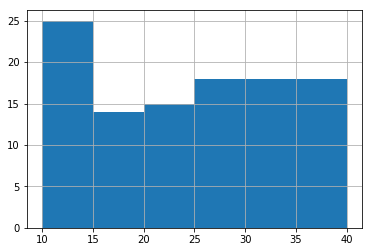

In [21]:
data_fraud['newbalanceDest'].hist(bins=[10,15,20,25,30,35,40])

#### Distribution of newbalancedest is similar to positively skewed

### correlation plot

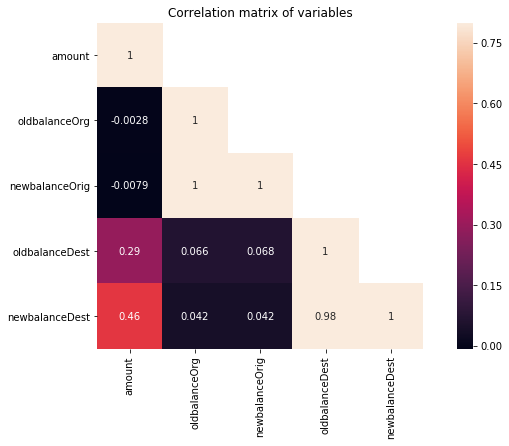

In [22]:
#correlation matrix
corrematrix = data_fraud[["amount","oldbalanceOrg","newbalanceOrig","oldba].corr()
mask=np.array(corrematrix)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(12,6))
sns.heatmap(corrematrix,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of variables')
plt.show()

#### Here correlation between newbalanceOrig and oldbalanceOrg is 1 it is high, we can use only one variable from this 2 for model training, testing
#### Here correlation between newbalanceDest and oldbalanceDest is 0.98 it is high, we can use only one variable from this 2 for model training, testing

In [23]:
data_fraud.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [24]:
data_fraud1 = data_fraud.drop(columns = ['newbalanceOrig', 'newbalanceDest'])


In [25]:
data_fraud1.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.0,0,0


In [26]:
le = LabelEncoder()
data_fraud1['type'] = le.fit_transform(data_fraud1['type'])
data_fraud1['nameOrig'] = le.fit_transform(data_fraud1['nameOrig'])
data_fraud1['nameDest'] = le.fit_transform(data_fraud1['nameDest'])


In [27]:
data_fraud1.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,1662094,0.0,0,0
1,1,3,1864.28,2188998,21249.0,1733924,0.0,0,0
2,1,4,181.00,1002156,181.0,439685,0.0,1,0
3,1,1,181.00,5828262,181.0,391696,21182.0,1,0
4,1,3,11668.14,3445981,41554.0,828919,0.0,0,0


### train test split of data

In [1]:
X = data_fraud1[['step', 'type', 'amount','nameOrig', 'oldbalanceOrg', 'nameDest', 'oldbalanceDest', 'isFlaggedFraud']]
Y = data_fraud1['isFraud']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

NameError: name 'data_fraud1' is not defined

In [29]:
print(len(X_train))

5090096


### training logistic regression

In [30]:
log_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
train_y_pred = log_clf.predict(X_train)
print('Training accuracy',accuracy_score(y_train, train_y_pred))
print('Training precision',precision_score(y_train, train_y_pred))
print('Training recall',recall_score(y_train, train_y_pred))
print('f1_Score',f1_score(y_train, train_y_pred))

Training accuracy 0.9986281201769083
Training precision 0.10843373493975904
Training recall 0.00819050508114667
f1_Score 0.015230573967000421


In [33]:
train_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
test_y_pred = log_clf.predict(X_test)
print('Testing accuracy',accuracy_score(y_test, test_y_pred))
print('Testing precision',precision_score(y_test, test_y_pred))
print('Testing recall',recall_score(y_test, test_y_pred))
print('Testing f1_Score',f1_score(y_test, test_y_pred))

Testing accuracy 0.9986326387557327
Testing precision 0.045454545454545456
Testing recall 0.003703703703703704
Testing f1_Score 0.006849315068493151


#### Here data is imbalanced and hence metrics are not good. We have to balance data for better results

### Data Balancing

In [ ]:
data_fraud1.head(5)

In [41]:
#data_fraud1_yes = data_fraud1.iloc[['isFraud']==0]
data_fraud1_yes = data_fraud1.loc[data_fraud1["isFraud"]==1]
print(data_fraud1_yes.shape)
data_fraud1_no = data_fraud1.loc[data_fraud1["isFraud"]==0]
print(data_fraud1_no.shape)

(8213, 9)
(6354407, 9)


In [42]:
data_fraud1_no_sample = data_fraud1_no.sample(n = 8213, replace = False)

In [56]:
data_fraud_balance = pd.concat([data_fraud1_no_sample, data_fraud1_yes], ignore_index=True)
data_fraud_balance = data_fraud_balance.sample(n=len(data_fraud_balance), replace=False)


In [57]:
data_fraud_balance.tail()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
11646,305,4,10000000.00,2168419,12321633.57,528271,0.0,1,0
2572,383,3,7185.44,1625662,9548.00,1524771,0.0,0,0
8903,59,4,192765.49,3945334,192765.49,348116,0.0,1,0
12838,410,4,950791.37,1036937,950791.37,110785,0.0,1,0
5121,188,3,18625.96,3847811,0.00,2203408,0.0,0,0


### train test split of balanced data

In [58]:
X = data_fraud_balance[['step', 'type', 'amount','nameOrig', 'oldbalanceOrg', 'nameDest', 'oldbalanceDest', 'isFlaggedFraud']]
Y = data_fraud_balance['isFraud']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [59]:
print(len(y_train))

13140


In [61]:
print(len(X_train))

13140


### training logistic regression on balance

In [63]:
log_clf_balance = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
train_y_pred = log_clf_balance.predict(X_train)
print('Training accuracy',accuracy_score(y_train, train_y_pred))
print('Training precision',precision_score(y_train, train_y_pred))
print('Training recall',recall_score(y_train, train_y_pred))
print('f1_Score',f1_score(y_train, train_y_pred))

Training accuracy 0.7719939117199391
Training precision 0.7672101449275363
Training recall 0.7775397796817626
f1_Score 0.7723404255319148


In [65]:
test_y_pred = log_clf_balance.predict(X_test)
print('Testing accuracy',accuracy_score(y_test, test_y_pred))
print('Testing precision',precision_score(y_test, test_y_pred))
print('Testing recall',recall_score(y_test, test_y_pred))
print('Testing f1_Score',f1_score(y_test, test_y_pred))

Testing accuracy 0.7824102251978089
Testing precision 0.7869928400954654
Testing recall 0.7865235539654144
Testing f1_Score 0.7867581270504026


In [67]:
from sklearn.ensemble import RandomForestClassifier
# Create the RandomForestClassifier model
rf = RandomForestClassifier(random_state=1)
# Fit the model
rf.fit(X_train, y_train)
# Use the trained model to predict Classes
y_pred_rf = rf.predict(X_test)
# Use the trained model to calculate the probabilities of each Class
test_probs_rf = rf.predict_proba(X_test)

# model performance
print(f'Model train accuracy: {rf.score(X_train, y_train)*100:.3f}%')
print(f'Model test accuracy: {rf.score(X_test, y_test)*100:.3f}%')
print(f'Model test precision: {precision_score(y_pred_rf,y_test):.3f}')
print(f'Model test recall: {recall_score(y_pred_rf,y_test):.3f}')
print(f'Model test f1_score: {f1_score(y_pred_rf,y_test):.3f}')


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model train accuracy: 99.893%
Model test accuracy: 97.870%
Model test precision: 0.980
Model test recall: 0.978
Model test f1_score: 0.979


#### Conclusion:
#### Here model trained on imbalanced data and metrics are very low for logistic regression with imbalaced data.
#### After balancing traained logistic and random forest model on data, metrics are good for raandom forest data. 
#### We can use random forest model on data for prediction